<a href="https://colab.research.google.com/github/swilsonmfc/nlp/blob/master/NLPSimpleTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Models - Text Classification
![alt text](https://miro.medium.com/max/300/0*2XpE-VjhhLGkFDYg.jpg)

# Setup

## Apex
*  "NVIDIA-maintained utilities to streamline mixed precision and distributed training in Pytorch"

In [2]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 7378 (delta 9), reused 4 (delta 1), pack-reused 7353
Receiving objects: 100% (7378/7378), 13.89 MiB | 28.56 MiB/s, done.
Resolving deltas: 100% (4982/4982), done.


In [3]:
cd apex

/content/apex


In [5]:
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-jjx_4un1
Created temporary directory: /tmp/pip-req-tracker-wu7edtdz
Created requirements tracker '/tmp/pip-req-tracker-wu7edtdz'
Created temporary directory: /tmp/pip-install-87r7u0aa
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-wmfa960_
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-wu7edtdz'
    Running setup.py (path:/tmp/pip-req-build-wmfa960_/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info


    torch.__version__  = 1.5.1+cu101


    running egg_info
    creating /tmp/pip-req-build-wmfa960_/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-wmfa960_/pip-egg-info/apex.egg-info/PK

In [6]:
cd ..

/content


## SimpleTransformers
* Builds on HuggingFaces Transformers library
* Easily construct SOTA models with relatively few lines of code
* Support for:
  * Sequence Classification
  * Token Classification (NER)
  * Question Answering
  * Language Model Fine-Tuning
  * Language Model Training
  * Language Generation
  * T5 Model
  * Seq2Seq Tasks
  * Multi-Modal Classification
  * Conversational AI
  * Text Representation Generation



In [7]:
pip install simpletransformers

     |████████████████████████████████| 204kB 5.5MB/s 
     |████████████████████████████████| 3.0MB 20.3MB/s 
     |████████████████████████████████| 778kB 50.0MB/s 
     |████████████████████████████████| 317kB 53.5MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 1.4MB 57.7MB/s 
     |████████████████████████████████| 890kB 41.3MB/s 
     |████████████████████████████████| 1.1MB 53.5MB/s 
     |████████████████████████████████| 112kB 58.4MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 163kB 53.8MB/s 
     |████████████████████████████████| 102kB 16.8MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=59b468b749bf0323eddfe8b2f97958f9f2cd9c8f13c04626fba0feeed0e467d9
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a825

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc

from simpletransformers.classification import ClassificationModel

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


# Kaggle
![alt text](https://image.shutterstock.com/image-vector/breaking-news-background-world-global-260nw-719766118.jpg)

In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

In [6]:
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# Data
* News Category Dataset
  * 41 Topic Classifications
  * Over 200,000 articles
  * Unbalanced dataset

In [7]:
!kaggle datasets download -d rmisra/news-category-dataset

 83% 21.0M/25.4M [00:01<00:00, 5.28MB/s]
100% 25.4M/25.4M [00:01<00:00, 17.0MB/s]


In [8]:
!unzip -q news-category-dataset.zip

## Read
* The file is a line based JSON document

In [9]:
df = pd.read_json('./News_Category_Dataset_v2.json', lines=True)
print(f'There are {len(df)} articles')

There are 200853 articles


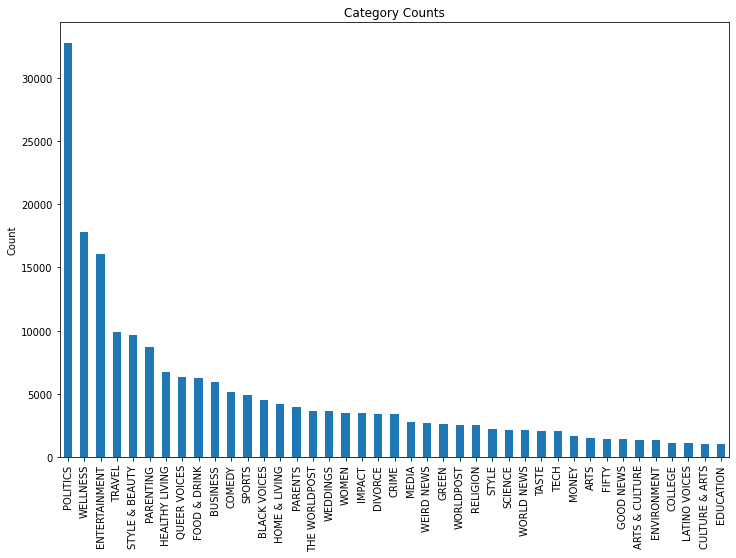

In [15]:
df[["category", "headline"]].category.value_counts().plot.bar(figsize = (12,8))
plt.ylabel('Count')
plt.title('Category Counts');

## Subset
* For this demo, we'll look at a small number of the most popular articles

In [54]:
CATEGORIES = ['ENTERTAINMENT', 'WELLNESS', 'POLITICS']
df = df[df['category'].isin(CATEGORIES)].copy()
print(f'There are {len(df)} articles after reducing')

There are 66624 articles after reducing


# EDA

In [60]:
df.dtypes

category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
target                        int64
combined                     object
dtype: object

In [59]:
df.head()

,category,headline,authors,link,short_description,date,target,combined
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,of course it has a song.,2018-05-26,0,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,the actor and his longtime girlfriend anna ebe...,2018-05-26,0,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,the actor gives dems an ass-kicking for not fi...,2018-05-26,0,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"the ""dietland"" actress said using the bags is ...",2018-05-26,0,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman 'devastated' that sexual harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""it is not right to equate horrific incidents ...",2018-05-26,0,morgan freeman 'devastated' that sexual harass...


## Target

In [9]:
grp = df.groupby('category').size()
grp

category
ENTERTAINMENT    16058
POLITICS         32739
WELLNESS         17827
dtype: int64

In [10]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df.category)

## Headlines
* We'll do very minimal feature engineering for a baseline
* Merge headline and the short description together 
* There are two headline categories that should be merged:
  * WORLDPOST
  * THE WORLDPOST

In [11]:
df['headline']          = df.headline.str.lower()
df['short_description'] = df.short_description.str.lower()
df['combined']          = df['headline'] + ' ' + df['short_description']

# NLP Task
* Text Classification
* Given the headline / description identify the category

## Context-Free vs Context-Aware
* In prior notebooks we looked at topic modeling and embeddings
* Topics and embeddings are context free:
  * Words with multiple meanings get the same embedding values
  * For example:
    * The **bank** was closed for a holiday.
    * The people sat on the river **bank**. 
* Language models are context aware:
  * Position in the sentence and neighboring words affect the word.
  * Context aware models can derive different meaning

## Classification Options
* Vector
  * Bag of Words 
  * TF-IDF 
  * Topic Model
  * Embedding
* Common Classifications
  * Naive Bayes
  * Bagging / Boosting
  * MLP
* Sequence Based Classification
  * LSTM / GRU
  * CNN

## Challenges
* You need many examples to train language models
  * Expensive
  * Time consuming
* Existing word vectors (word2vec) produce a 1-1 mapping between the token and the vector
* LSTMs have limits in number of tokens
  * Exploding / Vanishing gradients
  * You may need to add gradient clipping

# Seq2Seq
* While classification asks for a binary or multi-class output, we often need a sequence of labels emitted
* For these NLP tasks a Seq2Seq approach is used
  * Language Translation 
  * Text / Speech generation
  * Summarization
  * Relation / Named Entity Classification or Extraction
  * Chatbots
* In Seq2Seq we use an encoder and decoder
* Encoder
  * Typically is an LSTM or GRU
  * The encoder sees the original text token by token
  * It outputs an encoded vector 
* Decoder
  * Like the encoder, it uses an LSTM or GRU
  * Receives
    * An encoded vector from the Encoder
    * Start Token  
  * Continues sequentially until it emits a stop token
* Seq2Seq Intuition
  * The encoder takes our "understanding" and captures that in an embedding
  * The decoder emits a series of tokens (ending with a stop word)
  * These tokens represent a soft-max (over the vocabulary)


![alt text](https://www.kdnuggets.com/images/transformer-fig1-encoder-decoder-700.jpg)

## Attention Is All You Need 
* The challenge is how to get the best "embedding" in a Seq2Seq architecture
* The "input" tokens themselves are extremely helpful
  * Hidden states of the RNN in the encoder
  * Pass them, along with the encoder vector
* Influential paper published June 2017
* https://arxiv.org/abs/1706.03762

![alt text](https://jalammar.github.io/images/attention_sentence.png)

## Transformer Architecture

![alt text](http://nlp.seas.harvard.edu/images/the-annotated-transformer_14_0.png)

## Transfer Learning
* Builds on the advancements in the Transformer 
* Improvements in 2018
  * [Allen NLP Elmo](https://allennlp.org/elmo)
    * Embeddings from Language Models
  * [OpenAI Open-GPT](https://openai.com/blog/language-unsupervised/)
    * Generative Pretrained Transformer
  * [Google BERT](https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html)
    * Bidirectional Encoder Representations from Transformers
  * [FastAI](https://docs.fast.ai/text.html)
    * Universal Language Model - FIne Tuning
* Image processing productivity for NLP tasks
  * Reusable architecture
  * Reusable layer weights
* Massive training time reduction
  * From hundreds of hours and many GPU
  * 15-30 minutes one GPU
* Fine-Tuning language models
  * Small number of epochs (often 2-3)
* Magnitudes less data
  * We can focus on the task at hand
  * Don't need to "learn" language features

# Approach
* Use the SimpleTransformers high productivity / low code interface to a language modeling classification task
* Reuse the BERT trained language model
* BERT builds on the Transformer architecture
* Apply the BERT tokenization
* Use the language model to classify our category given the text headline + description
* Evaluate our results


# Preprocessing
* Standard train - test split
* Tokenizing the text for BERT

## Train-Test

In [13]:
X = df[['combined', 'target']].copy()
X = X.sample(frac=0.1)
y = X['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=987)

In [57]:
print(f'Train {X_train.shape}, {y_train.shape}')
print(f'Test  {X_test.shape}, {y_test.shape}')

Train (4996, 2), (4996,)
Test  (1666, 2), (1666,)


In [56]:
print(f'Average Description Length {np.mean(X_train.combined.str.len()):.2f}')
print(f'Median  Description Length {np.median(X_train.combined.str.len()):.2f}')

Average Description Length 171.24
Median  Description Length 164.00


## BERT Encoding
* BERT uses a special encoding format for words in sentences
* Can take in one or two sentences
* [CLS] Start of the classficiation task
* [SEP] Separates sentence 1 from 2 and always provided
* BERT has word embeddings for 30,000 words (much smaller than an English vocabulary)
* BERT avoids using unknown tokens
* BERT uses a word piece model
* BERT will break out parts of the word into tokens:
  * "embeddings" is not in the vocab
  * Rather than [UNK] it's broken up piece-wise
  * Parts of words are tagged with ##
  * em, ##bed, ##ding ##s


# Model

In [17]:
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=3,
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True})

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Train
* SimpleTransformers will default to a 2 column scheme
  * First column is the text to encode
  * Second column is the target library
* The encoding will be specific to the transformer loaded into the Model

In [18]:
X_train

,combined,target
15695,when will the economy start caring about home-...,1
120801,"""amazing grace"" garcia and her legacy among te...",1
108099,new york police study reveals 'stark racial bi...,1
200103,what to do at the gym: your fitness etiquette ...,2
166760,stress less: 30 things you decided are not wor...,2
...,...,...
154354,'the hobbit 2' poster: 'desolation of smaug' i...,0
90173,kylie jenner & tyga get close at the monaco gr...,0
157672,signs of stress (video) you are not alone. eig...,2
34208,regis philbin says 'very offended' kelly ripa ...,0


In [19]:
model.train_model(X_train)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:278: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:114: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


# Eval

In [20]:
result, model_outputs, wrong_predictions = model.eval_model(X_test)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:751: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [21]:
result

{'eval_loss': 0.20359978386374752, 'mcc': 0.9248603448734802}

In [22]:
model_outputs

array([[-2.34375   ,  3.7265625 , -2.3496094 ],
       [-1.7480469 ,  4.0625    , -3.4726562 ],
       [-2.2773438 ,  4.0976562 , -2.8886719 ],
       ...,
       [-1.8154297 ,  3.7597656 , -3.0703125 ],
       [ 0.8173828 ,  1.5527344 , -2.2832031 ],
       [-0.56347656,  2.3320312 , -1.9833984 ]], dtype=float32)

# Predict

In [28]:
X_test

,combined,target
4608,bomb-sniffing army dogs got terrible treatment...,1
54193,trump praises saddam hussein again — this time...,1
81841,hillary clinton compares gop's 'extreme views'...,1
3416,gal gadot beautifully thanks wonder woman on s...,0
51782,maggie gyllenhaal just starred in three movies...,0
...,...,...
110056,"yup, chelsea handler posted this photo on twit...",0
143202,'the secret life of walter mitty' review: earn...,0
78404,cruz: letting muslim syrian refugees into the ...,1
115869,'i'm having an abortion this weekend',1


In [31]:
pred = model.predict(X_test['combined'].tolist())

In [40]:
y_test

4608      1
54193     1
81841     1
3416      0
51782     0
         ..
110056    0
143202    0
78404     1
115869    1
17630     1
Name: target, Length: 1666, dtype: int64

In [41]:
pred_classes = pred[0]
pred_classes

array([1, 1, 1, ..., 1, 1, 1])

# Results

In [43]:
encoded_classes    = CATEGORIES
predicted_category = [encoded_classes[x] for x in pred_classes]
true_category      = [encoded_classes[x] for x in y_test]

result_df = pd.DataFrame({'description' : X_test['combined'],
                          'true_category' : true_category, 
                          'predicted_category' : predicted_category})
result_df.head()

,description,true_category,predicted_category
4608,bomb-sniffing army dogs got terrible treatment...,WELLNESS,WELLNESS
54193,trump praises saddam hussein again — this time...,WELLNESS,WELLNESS
81841,hillary clinton compares gop's 'extreme views'...,WELLNESS,WELLNESS
3416,gal gadot beautifully thanks wonder woman on s...,ENTERTAINMENT,ENTERTAINMENT
51782,maggie gyllenhaal just starred in three movies...,ENTERTAINMENT,ENTERTAINMENT


In [48]:
def print_classification_report(test, pred, target_names):
  report = classification_report(test, pred, target_names=target_names)
  print(report)  

def plot_confusion(test, pred, labels):
  cm = confusion_matrix(test, pred)
  df = pd.DataFrame(cm, labels, labels)
  plt.figure(figsize=(10, 10))
  sns.heatmap(df, annot=True, fmt='d', cmap='BuGn')
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
  plt.show()

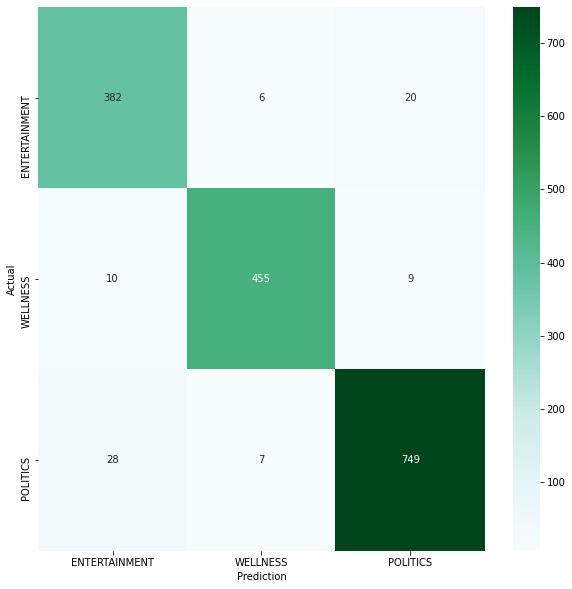

In [49]:
plot_confusion(true_category, 
               predicted_category, 
               list(encoded_classes))

In [51]:
print_classification_report(true_category, 
               predicted_category, 
               list(encoded_classes))

               precision    recall  f1-score   support

ENTERTAINMENT       0.91      0.94      0.92       408
     WELLNESS       0.97      0.96      0.97       474
     POLITICS       0.96      0.96      0.96       784

     accuracy                           0.95      1666
    macro avg       0.95      0.95      0.95      1666
 weighted avg       0.95      0.95      0.95      1666



# Closing
* Consider layering:
  * SimpleTransformers 
    * Like FastAI for PyTorch and Keras for TF
    * Great for baselining / POC
    * Downside, installation isn't trivial with Apex (pip)
  * Transformers 
    * HuggingFace (https://github.com/huggingface)
    * Build your fine-tuning model
    * Manipulate the tokenization & layering of archtecture
* Jay Alammar 
  * http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
  * http://jalammar.github.io/illustrated-bert/